# Regresión lineal: predecir los gastos médicos de pacientes

## Descarga e instalación de librerías
---

In [1]:
# Lo primero que se hará es descargar la librería regressors que ayudará a hacer un análisis más profundo sobre la regresión lineal.

# pip install regressors

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


sns.set(style='whitegrid', context='notebook')

In [5]:
#Ubicarme en la rais para poder utilizar todas las carpetas

from sys import path
import os

path.append(os.path.realpath('../'))

## Descargando los datos
---
Descarguemos los datos y veamos cómo se ven.

In [6]:
df = pd.read_csv('../../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
---
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<Axes: >

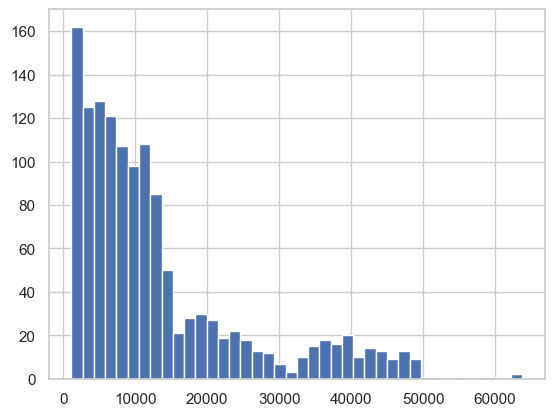

In [7]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [8]:
df[df.charges>50000]


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


En este caso, al ser pocos datos (7 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que NO SE DEBEN ELIMINAR datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

In [9]:
df = df[df.charges<50000]

## Viendo correlaciones

---


Ahora entendamos nuestros datos viendo cómo se distribuyen y correlacionan.

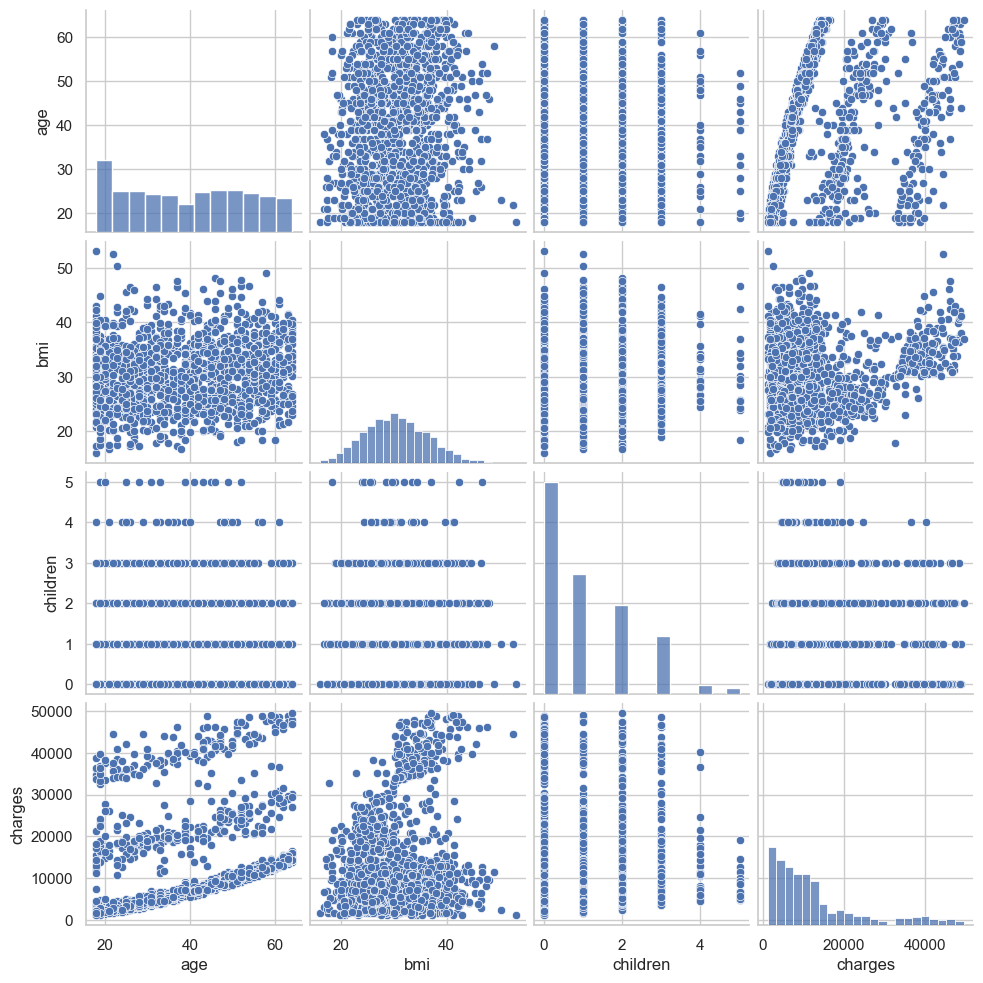

In [8]:

sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

<Axes: >

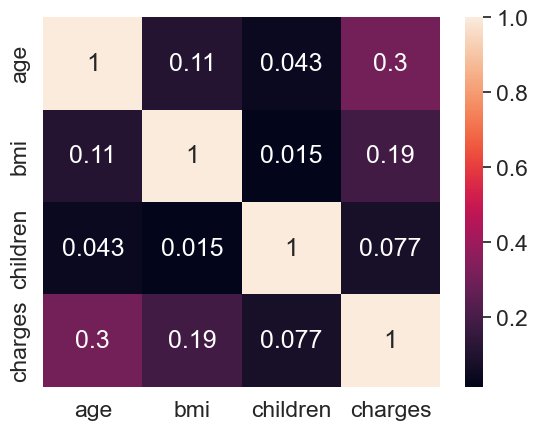

In [10]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función **[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)** de pandas.



In [11]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Creando modelos
Primero se usará un modelo con todas las variables.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [14]:
y_pred.shape

(333, 1)

In [15]:
y_pred

array([[-2.43054369e-01],
       [-9.22142141e-01],
       [ 1.86138993e+00],
       [-3.21179764e-01],
       [ 1.55048399e+00],
       [-7.86099579e-01],
       [-7.09743792e-01],
       [ 1.18056587e+00],
       [ 1.12305803e+00],
       [ 1.85839069e-02],
       [-4.99670501e-01],
       [ 1.14843532e+00],
       [-4.35046383e-01],
       [-1.37840798e-01],
       [-8.27263484e-01],
       [-1.01275467e+00],
       [-3.19758171e-01],
       [-3.69975201e-01],
       [-3.03238503e-01],
       [-6.14394453e-01],
       [-7.61664607e-01],
       [-8.13888954e-01],
       [-8.44166944e-01],
       [-1.68783858e-01],
       [-7.33156530e-01],
       [-4.93322921e-02],
       [-3.77993244e-01],
       [ 1.72445219e-01],
       [-2.94752119e-01],
       [ 2.01704439e-01],
       [ 1.03322214e-02],
       [-1.08005559e-01],
       [-7.06530681e-01],
       [-9.70477989e-01],
       [ 3.73710043e-01],
       [-7.34460915e-01],
       [-1.05226316e+00],
       [-2.76101437e-01],
       [-9.3

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [128]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)


print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.76
mse:  0.2342


El siguiente código muestra un resumen general de los resultados.

In [129]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [130]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8953 -0.0979  0.0914 0.2297 0.9762


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.004360    0.026593   0.1640  0.869868
age               0.310510    0.025987  11.9484  0.000000
region_northwest -0.016933    0.030290  -0.5590  0.576531
children          0.045037    0.027147   1.6590  0.098068
sex_male          0.000639    0.026867   0.0238  0.981038
smoker_yes        0.802883    0.026397  30.4154  0.000000
region_southeast -0.026134    0.032188  -0.8119  0.417422
bmi               0.155912    0.027661   5.6365  0.000000
region_southwest -0.033544    0.031412  -1.0679  0.286358
---
R-squared:  0.75996,    Adjusted R-squared:  0.75403
F-statistic: 128.22 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

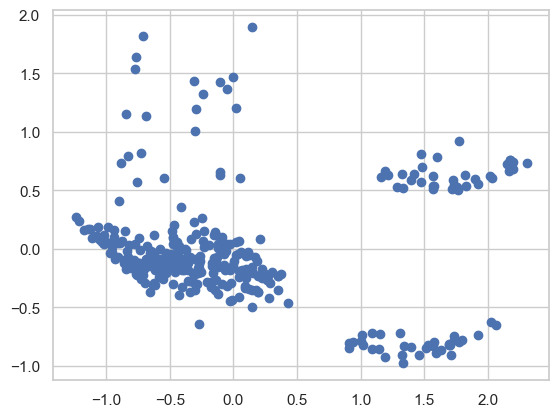

In [131]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [142]:
df_second = df.copy()
df_second['age2'] = df_second.age**2 
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int) #en vez de que me de un valoor boleano TRUE/FALSE que me muestre 1 / 0
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

In [143]:
X_cols = list(set(df_second.columns)-set(['charges']))
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [144]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.864
mse:  0.1436


In [145]:
model.coef_ = model.coef_.reshape(-1)

In [146]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-1.7145 0.0414  0.0983 0.1392 0.2642


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.020826   0.0000  1.000000
age               -0.113880    0.108103  -1.0534  0.292902
region_northwest  -0.026314    0.023486  -1.1204  0.263335
age2               0.436351    0.108100   4.0366  0.000067
sobrepeso*fumador  0.495305    0.028768  17.2173  0.000000
children           0.077887    0.020207   3.8545  0.000139
sobrepeso         -0.034053    0.033693  -1.0107  0.312893
sex_male          -0.021246    0.021016  -1.0109  0.312785
smoker_yes         0.458726    0.027188  16.8724  0.000000
region_southeast  -0.027668    0.025392  -1.0897  0.276657
bmi                0.045377    0.036235   1.2523  0.211346
region_southwest  -0.050136    0.024397  -2.0550  0.040662
---
R-squared:  0.86399,    Adjusted R-squared:  0.85933
F-statistic: 185.37 on 11 features


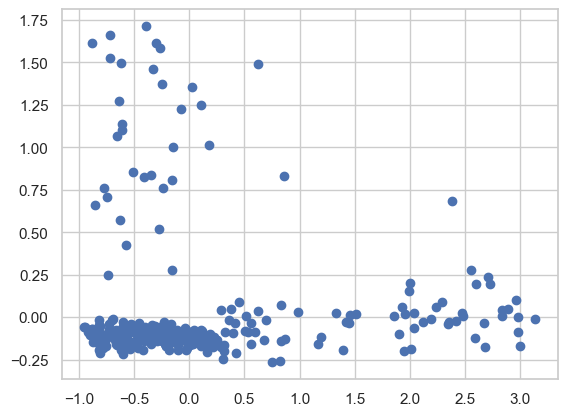

In [147]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

## Mejores variables del modelo
solo tomaremos las variables predictoras con p <= 0.05

In [149]:
X_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children','region_southwest']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [150]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.9134
mse:  0.08


In [151]:
model.coef_ = model.coef_.reshape(-1)

In [152]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-1.7203 0.0652  0.1064 0.1387 0.3994


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.015636   0.0000  1.000000
sobrepeso*fumador  0.487267    0.019302  25.2439  0.000000
smoker_yes         0.460812    0.018277  25.2132  0.000000
age2               0.318384    0.014928  21.3274  0.000000
children           0.063136    0.016301   3.8731  0.000129
region_southwest  -0.032244    0.015413  -2.0920  0.037198
---
R-squared:  0.91339,    Adjusted R-squared:  0.91207
F-statistic: 689.72 on 5 features


! R² (Coeficiente de Determinación)    OBSERVO QUE r2 subio de 0.86 -> 0.91

! MSE (Error Cuadrático Medio):        mse bajo y se acerca mas a 0 -> 0.08

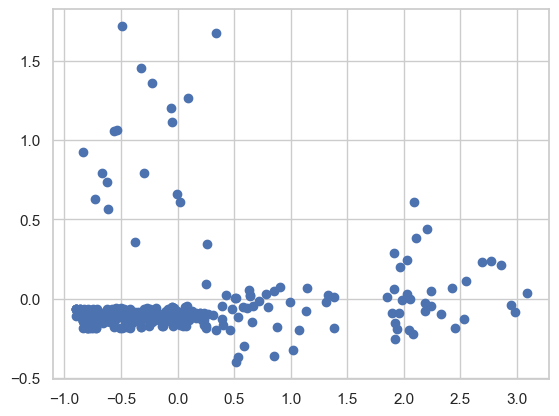

In [153]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

me quedo con las variables predictoras : 

X_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children','region_southwest']


## Probando el modelo


In [165]:
y_pred

array([[-0.8642242 ],
       [-0.5989479 ],
       [-0.67135308],
       [-0.80117331],
       [ 2.23995623],
       [-0.29403339],
       [ 1.13147095],
       [ 0.03579576],
       [-0.80117331],
       [ 0.07791703],
       [-0.06171003],
       [-0.83426474],
       [-0.26546728],
       [-0.80117331],
       [ 0.39033602],
       [ 0.90907209],
       [-0.47330319],
       [ 0.09229534],
       [-0.73664128],
       [ 1.92533309],
       [-0.83426474],
       [-0.63566999],
       [-0.00697896],
       [-0.67154359],
       [-0.55935131],
       [-0.49420746],
       [-0.04966589],
       [-0.34572027],
       [-0.42093297],
       [-0.89901263],
       [ 0.64375416],
       [-0.59942124],
       [-0.39097351],
       [-0.65179146],
       [-0.6823374 ],
       [ 2.05602262],
       [ 0.2627531 ],
       [ 0.19666062],
       [ 0.1265181 ],
       [-0.68804021],
       [-0.83561194],
       [-0.60227492],
       [-0.60588024],
       [-0.4504607 ],
       [-0.2484258 ],
       [ 2

In [171]:
df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [173]:
# Realizar la predicción utilizando el modelo entrenado
predictores_X = np.array([0, 1, 19, 0, 1]) 

# Reshape a un formato bidimensional
datos_reshaped = predictores_X.reshape(1, -1)

prediccion = model.predict(datos_reshaped)

# Imprimir el resultado de la predicción
#print(f"Resultado de la predicción: {prediccion[0]:.2f}")

print("Resultado de la predicción: " + str(prediccion[0]) )

Resultado de la predicción: 6.47785828383304


In [ ]:
predictions_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_lr_test_pred})

# Plot real values vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real Values', y='Predicted Values', data=predictions_df)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

# Add labels and title
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')

# Show the plot
plt.show()